In [276]:
# make vocabulary

import pandas as pd
import numpy as np
from collections import Counter
import pickle
import matplotlib.pyplot as plt

# Import required packages
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



In [277]:
def save_obj(obj,name):

    with open ('data/' + name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
        
def load_obj (name):
    
    with open ('data/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)
        

In [278]:
df = pd.read_csv('data/data_preprocessed.csv', usecols=['description_stemmed'])
df.head()

,description_stemmed
0,papill eur in eleg compless residenzial rifini...
1,fleming in strad priv via alessandr fleming si...
2,torrevecc adiacent larg artur donagg appart in...
3,balduin adiacent piazz giovenal appart in vend...
4,in via savon una strad tranquill nel cuor di s...


In [280]:
def make_vocabulary(df):
    
    # vocabulary dict
    voc = {}
    
    # term_id initialized to 0
    cnt = 0
    
    for i in range(len(df)):
        
        # get the list 
        word_list = set(df.iloc[i].description_stemmed.split())
        
        for word in word_list:
            if word not in voc:
                voc[word] = cnt 
                cnt += 1
                
    save_obj(voc,'vocabulary')
    
    return
        

In [281]:
df = pd.read_csv('data/data_preprocessed.csv', usecols=['description_stemmed'])

In [282]:
make_vocabulary(df)

In [283]:
voc = load_obj('vocabulary')

In [284]:
from math import log
from time import time

In [285]:
start = time()
# make tfidf numpy matrix

# call the vocabulary
voc = load_obj('vocabulary')

# initialize a numpy matrix to zero
n = len(df) # number of announcements
tot_words = len(voc) # number of words
s = (n, tot_words) # nrow and ncol
TF_matrix = np.zeros(s)

# words in all the announcements (with repetitions, max 1 word for each announcement)
total_words_occurrencies = []

# for each announcement
for i in range(len(df)):
    
    # empty words_list
    words_list = []
    # create the list from the description (stemmed) string
    words_list = (df.iloc[i].description_stemmed).split()
    
    # map all the words to their vocabulary term_id  
    words_list = list(map(lambda x: voc[x], words_list))
    
    # the term_id is the index pointing the columns of TF matrix, IDF array and TFIDF matrix
    # use counter to count the TF with a dictionary
    counter_dict = Counter(words_list)
    
    # for each term_id in the dict, put into the current announcement (row(i))
    # the relative frequence of the word in the single announcement
    for term_id in counter_dict.keys():
        TF_matrix[i][term_id] = counter_dict[term_id] / len(words_list)
    
    # set the words (max 1 word for each announcement!) and add it the main list
    total_words_occurrencies += list(set(words_list))

# Count the occurrencies 
counter_dict = Counter(total_words_occurrencies)

# initialize IDF_array
IDF_array = np.zeros(tot_words)

# for each term_id, fill IDF_array[term_id] with its occurrencies in counter_dict[term_id]
for term_id in counter_dict.keys():
    IDF_array[term_id] = log(n/counter_dict[term_id])

# broadcast operation: we can multiply each TFIDF row element wise with IDF_array
TFIDF_matrix = TF_matrix*IDF_array


end = time()
print(end-start)

5.662861108779907


In [286]:
keys = list(voc.items())

In [287]:
keys[:10]

[('chiusur', 0),
 ('pres', 1),
 ('condizion', 2),
 ('serr', 3),
 ('soggiorn', 4),
 ('sab', 5),
 ('cottur', 6),
 ('papill', 7),
 ('con', 8),
 ('lett', 9)]

In [288]:
df.iloc[0].description_stemmed

'papill eur in eleg compless residenzial rifinitissim bilocal compost da soggiorn con angol cottur stanz da lett bagn e ampi balcon con rifinitur di preg pav in parquet grees infiss in legn con vetr camer e port in noc grat nel salon riscald termoautonom con caldai centralizz ari condizion videocitof port blind serr elettr con chiusur centralizz antenn satellit isol term acust pannell solar e fotovolt rilev elettron di gas tutt le cam son forn di impiant antifurt pres antenn satellit e pres telefon orar luned chius marted 10001700 mercoled 10001700 gioved 10001700 venrd 10001700 sab 10001700 domen 10001300'

In [289]:
TFIDF_matrix[0][voc['papill']]

0.05197712346833944

In [290]:
len(TFIDF_matrix)

7383

In [291]:
len(TFIDF_matrix[2])

20850

In [292]:
TFIDF_matrix

array([[0.05745515, 0.08710738, 0.01340147, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.01163812, ..., 0.        , 0.        ,
        0.07813101],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# KMEANS WITH TFIDF 

In [318]:
tfidf_dataframe

,0,1,2,3,4,5,6,7,8,9,...,20840,20841,20842,20843,20844,20845,20846,20847,20848,20849
0,0.057455,0.087107,0.013401,0.048782,0.010620,0.032873,0.018729,0.051977,0.006085,0.008834,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004462,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.005364,0.000000,0.000000,0.000000,0.001844,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000964,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.003157,0.000000,0.000000,0.000000,0.002171,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.009755,0.000000,0.000000,0.000000,0.000000,0.000000,0.001772,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002510,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [319]:
7383*0.05

369.15000000000003

In [308]:
temp.head()

,0,1,2,3,4,5,6,7,8,9,...,20840,20841,20842,20843,20844,20845,20846,20847,20848,20849
0,0.057455,0.087107,0.013401,0.048782,0.010620,0.032873,0.018729,0.051977,0.006085,0.008834,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004462,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.005364,0.000000,0.000000,0.000000,0.001844,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [328]:
temp = tfidf_dataframe
col_to_delete = []
threshold = 370
announcements = len(tfidf_dataframe)
words_counting = []

temp = temp.where(temp != 0)

for i in range(len(temp)):
    cnt_words = len(temp) - temp.loc[:,i].isna().sum()
    if  cnt_words < threshold  or cnt_words > announcements - threshold :
        col_to_delete.append(i)
    words_counting.append(cnt_words)
    

In [331]:
temp.drop(columns=col_to_delete, axis=1)

,2,4,6,8,9,11,16,18,19,21,...,20840,20841,20842,20843,20844,20845,20846,20847,20848,20849
0,0.013401,0.010620,0.018729,0.006085,0.008834,0.002094,0.011151,0.028509,0.011077,0.004299,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,0.004462,NaN,0.004266,NaN,NaN,0.009025,0.001751,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.005364,NaN,0.001844,NaN,0.002116,0.028161,NaN,0.005595,0.002171,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,0.000964,NaN,0.003870,0.017663,NaN,0.008773,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,0.003157,NaN,0.002171,NaN,0.002490,0.003315,NaN,0.009879,0.002556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.009755,NaN,NaN,0.001772,NaN,0.004573,0.016234,NaN,0.008063,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,0.003965,0.018097,NaN,0.008988,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,0.002510,NaN,0.001152,0.009199,NaN,0.009138,0.003546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0,0.5,'How many announcement for word ')

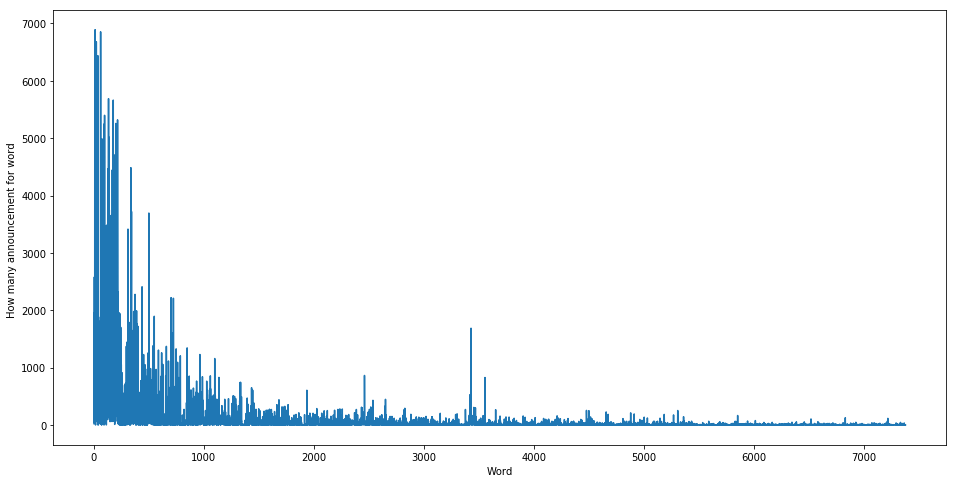

In [322]:
f = plt.figure(figsize=(16,8))
plt.plot(words_counting)

plt.xlabel('Word')
plt.ylabel('How many announcement for word ')

In [317]:
tfi

description_stemmed    papill eur in eleg compless residenzial rifini...
Name: 0, dtype: object

In [251]:
t = []
for elem in col_to_delete:
    t.append(str(elem))

In [255]:
len(col_to_delete)

9143

In [332]:
mms.fit(tfidf_dataframe)
data_transformed = mms.transform(tfidf_dataframe)

NameError: name 'mms' is not defined

In [129]:
start = time()
Sum_of_squared_distances = []
K = range(1,4)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
end = time()
print(end-start)

0.03416109085083008


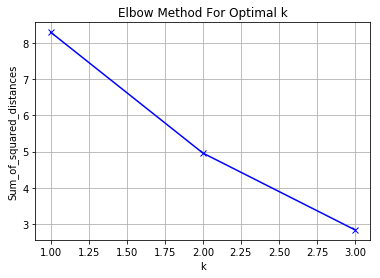

In [130]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()